<img src ='Customer-Segmentation.jpg' style='width"5px ; hight:5px'>

# <span style='color:Green'> Import Libraries.  </span>

In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn import datasets
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.ensemble import GradientBoostingClassifier

#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=DeprecationWarning)
#warnings.simplefilter(action='ignore', category=RuntimeWarning)

## <span style='background :White' > <span style='color:Green'> Read Data  </span> </span>

In [131]:
df = pd.read_csv(r"D:\Data Science\Data\Final project banck segmentation\bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.0
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.5


In [132]:
df.shape

(1048567, 9)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [134]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [135]:
df.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

### <span style='background :White' > <span style='color:Green'> Data Cleaning </span> </span>

In [136]:
print(df['CustGender'].value_counts())
print(df[(df['CustGender']== 'T')])

df.drop(df.index[959987] , axis=0 , inplace=True)
df.CustGender.value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64
       TransactionID CustomerID CustomerDOB CustGender CustLocation  \
959987       T959988   C3380368    1/1/1800          T      CHENNAI   

        CustAccountBalance TransactionDate  TransactionTime  \
959987             50050.0       10/9/2016           170731   

        TransactionAmount (INR)  
959987                  32500.0  


M    765530
F    281936
Name: CustGender, dtype: int64

In [137]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'] , dayfirst=True)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'] , dayfirst=True)
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

indexAge = df[(df['Age'] <= 20)].index
df.drop(indexAge,inplace=True)

indexAge1 = df[(df['Age'] >= 100)].index
df.drop(indexAge1,inplace=True)
df.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,59.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,28.0
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,173940,676.00,44.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,173806,566.00,24.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,170537,148.00,34.0
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,192825,833.00,28.0
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,192446,289.11,32.0
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2016-08-02,204133,259.00,34.0


In [138]:
df.drop(['TransactionID','CustomerDOB','CustGender','CustLocation','TransactionDate','TransactionTime','Age'],axis=1,inplace=True)
df.head()

,CustomerID,CustAccountBalance,TransactionAmount (INR)
0,C5841053,17819.05,25.0
1,C2142763,2270.69,27999.0
3,C5342380,866503.21,2060.0
4,C9031234,6714.43,1762.5
5,C1536588,53609.20,676.0


In [139]:
df.dropna(inplace=True)

In [140]:
df_new = df.groupby('CustomerID').agg({'CustAccountBalance':'mean','TransactionAmount (INR)':'mean'})

df_new.head()

,CustAccountBalance,TransactionAmount (INR)
CustomerID,,
C1010011,76340.635,2553.0
C1010012,24204.490,1499.0
C1010014,100112.950,727.5
C1010018,496.180,30.0
C1010028,296828.370,557.0


In [141]:
df_new.isnull().sum()

CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64

In [142]:
df_new = df_new.sample (n=10000,random_state=0)

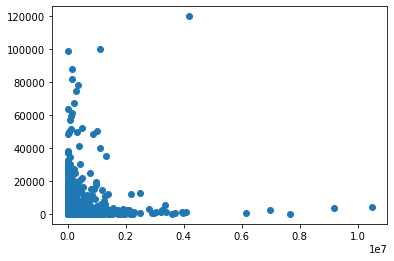

In [143]:
plt.scatter(x = df_new['CustAccountBalance'] , y = df_new['TransactionAmount (INR)'])

## <span style='background :White' > <span style='color:Green'> Modelling  </span> </span>

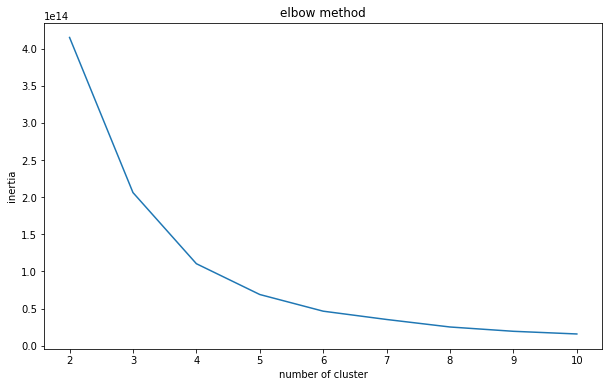

In [144]:
inertia = []
K_range = range(2,11)

for i in K_range :
    Kmeans = KMeans( n_clusters = i , init = 'k-means++' , random_state = 0 )
    Kmeans.fit (df_new)
    inertia.append (Kmeans.inertia_)

fig , ax = plt.subplots(figsize=(10, 6))
sns.lineplot (x=K_range , y =inertia , ax = ax )
plt.title ('elbow method')
plt.xlabel('number of cluster')
plt.ylabel('inertia')

plt.show()

### K-Means

In [145]:
df_new.head()

,CustAccountBalance,TransactionAmount (INR)
CustomerID,,
C8711369,12983.250,4775.00
C6612311,181899.270,1752.00
C8539232,24925.275,140.00
C2442178,55364.990,1843.96
C3318615,3991492.110,696.00


In [146]:

km4 = KMeans( n_clusters = 4 , init = 'k-means++' , random_state = 42 )
X_kmeans = km4.fit (df_new)
y_kmeans = X_kmeans.predict (df_new)

In [147]:
df_new['cluster'] = y_kmeans

In [148]:
df_new.head()

,CustAccountBalance,TransactionAmount (INR),cluster
CustomerID,,,
C8711369,12983.250,4775.00,1
C6612311,181899.270,1752.00,1
C8539232,24925.275,140.00,1
C2442178,55364.990,1843.96,1
C3318615,3991492.110,696.00,3


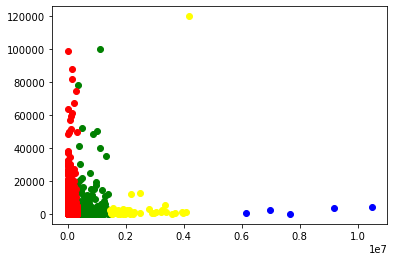

In [149]:
df1= df_new [df_new.cluster ==0]
df2= df_new [df_new.cluster ==1]
df3= df_new [df_new.cluster ==2]
df4= df_new [df_new.cluster ==3]
#df5= df_scaled [df_scaled.cluster ==4]
#df6= df_scaled [df_scaled.cluster ==5]
#df7= df_scaled [df_scaled.cluster ==6]
#df8= df_scaled [df_scaled.cluster ==7]
plt.scatter(df1['CustAccountBalance'] ,df1['TransactionAmount (INR)'] , color = 'green',)
plt.scatter(df2['CustAccountBalance'] ,df2['TransactionAmount (INR)'] , color = 'red')
plt.scatter(df3['CustAccountBalance'] ,df3['TransactionAmount (INR)'] , color = 'blue')
plt.scatter(df4['CustAccountBalance'] ,df4['TransactionAmount (INR)'] , color = 'yellow')
#plt.scatter(df5['CustAccountBalance'] ,df5['TransactionAmount (INR)'] , color = 'pink')
#plt.scatter(df6['Age'] ,df6['TransactionAmount (INR)'] , color = 'black')
#plt.scatter(df7['Age'] ,df7['TransactionAmount (INR)'] , color = 'gray')
#plt.scatter(df8['Age'] ,df8['TransactionAmount (INR)'] , color = 'purple')

In [150]:
df_new.cluster.value_counts()

1    9493
0     450
3      52
2       5
Name: cluster, dtype: int64

In [151]:
df_new.head()

,CustAccountBalance,TransactionAmount (INR),cluster
CustomerID,,,
C8711369,12983.250,4775.00,1
C6612311,181899.270,1752.00,1
C8539232,24925.275,140.00,1
C2442178,55364.990,1843.96,1
C3318615,3991492.110,696.00,3


In [152]:
pred_1 = km4.predict([[4091492.0 , 696.00]])
pred_1[0]

c:\Users\Heba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


3

In [153]:
import pickle

pickle.dump(X_kmeans, open('model.pkl', 'wb'))
#Model_kmeans = pickle.load(open('model.pkl','rb'))

In [154]:
a=65
b=44
data = [[a,b]]
df = pd.DataFrame(data, columns=['CustAccountBalance','TransactionAmount (INR)'])
df

,A,B
0,65,44


In [155]:
km4.predict(df)  

c:\Users\Heba\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- A
- B
Feature names seen at fit time, yet now missing:
- CustAccountBalance
- TransactionAmount (INR)

  warnings.warn(message, FutureWarning)


array([1])

In [156]:
Model_kmeans = pickle.load(open('model.pkl','rb'))
Model_kmeans.predict(df)



c:\Users\Heba\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- A
- B
Feature names seen at fit time, yet now missing:
- CustAccountBalance
- TransactionAmount (INR)

  warnings.warn(message, FutureWarning)


array([1])